In [1]:
import pandas as pd

# 读取数据
x_data = pd.read_csv('data/train.csv')

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
# 查看数据维度
x_data.shape
x_data

,ID,企业类型,经营期限至,登记机关,企业状态,邮政编码,投资总额,注册资本,核准日期,行业代码,...,应收账款_年末数,一年内到期的非流动资产_年末数,油气资产_年末数,应收补贴款_年末数,应收股利_年末数,应收利息_年末数,应收票据_年末数,预付款项_年末数,资产总计_年末数,在建工程_年末数
0,1,9.0,NaN,1.0,0.0,266300,19.110000,19.110000,00:00.0,5154.0,...,142.310005,0.0,0.0,0.0,0.0,0.0,28.122902,1.004419,632.032182,0.0
1,3,11.0,NaN,5.0,0.0,266000,29.154194,19.210446,00:00.0,7214.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,0.0,NaN,3.0,0.0,266000,NaN,19.120045,13:31.0,2110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,0.0,42:05.0,9.0,0.0,266000,NaN,19.160223,00:00.0,5163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,0.0,NaN,2.0,0.0,266400,NaN,19.210446,00:00.0,5439.0,...,156.901030,0.0,0.0,0.0,0.0,0.0,10.044194,0.508236,319.205293,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14361,23937,0.0,NaN,1.0,0.0,266300,NaN,24.172472,00:00.0,4790.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14362,23940,35.0,NaN,4.0,0.0,266003,NaN,19.110000,00:00.0,6629.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14363,23941,2.0,NaN,1.0,0.0,266300,19.110000,19.511784,00:00.0,3824.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14364,23942,1.0,NaN,0.0,1.0,NaN,NaN,19.112511,42:06.0,7249.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
y_data = pd.read_csv('data/train_label.csv')

In [4]:
y_data.shape

(14366, 2)

In [5]:
y_data = y_data['Label']
y_data

0        0
1        0
2        0
3        0
4        0
        ..
14361    0
14362    0
14363    0
14364    0
14365    0
Name: Label, Length: 14366, dtype: int64

In [6]:


# 使用缺失率阈值75%进行特征筛选
import numpy as np
column_names = x_data.columns
flag = False
for column_name in column_names:
    if column_name == '递延收益_年初数':
        flag = True
    if flag:
        x_data[column_name].replace(0, np.nan, inplace=True)
    tmp = x_data[column_name].isnull().sum() * 100 / x_data.shape[0]
    if tmp > 75:
        x_data = x_data.drop(labels=column_name,axis=1)
        print('删除特征列'+column_name+',缺失值占比高达{}'.format(tmp))

删除特征列经营期限至,缺失值占比高达80.49561464569122
删除特征列投资总额,缺失值占比高达79.93178337741891
删除特征列注销时间,缺失值占比高达76.35389113183906
删除特征列递延收益_年初数,缺失值占比高达99.55450368926633
删除特征列长期负债合计_年初数,缺失值占比高达100.0
删除特征列长期借款_年初数,缺失值占比高达97.3548656550188
删除特征列长期应付款_年初数,缺失值占比高达98.35027147431435
删除特征列短期借款_年初数,缺失值占比高达91.75135737157177
删除特征列递延所得税负债_年初数,缺失值占比高达99.89558680217179
删除特征列非流动负债合计_年初数,缺失值占比高达94.80718362801058
删除特征列交易性金融负债_年初数,缺失值占比高达99.97911736043436
删除特征列其他非流动负债_年初数,缺失值占比高达99.18557705693999
删除特征列其他负债（或长期负债）_年初数,缺失值占比高达100.0
删除特征列其他流动负债_年初数,缺失值占比高达96.05318112209383
删除特征列其他应交款_年初数,缺失值占比高达100.0
删除特征列实收资本（或股本）净额_年初数,缺失值占比高达99.99303912014479
删除特征列小企业_应付利润_年初数,缺失值占比高达99.43616873172769
删除特征列应付福利费_年初数,缺失值占比高达100.0
删除特征列应付股利_年初数,缺失值占比高达99.78421272448837
删除特征列应付利息_年初数,缺失值占比高达99.20645969650563
删除特征列应付票据_年初数,缺失值占比高达97.7168314074899
删除特征列应付职工薪酬_年初数,缺失值占比高达81.02464151468746
删除特征列应付债券_年初数,缺失值占比高达99.97215648057914
删除特征列预计负债_年初数,缺失值占比高达99.88862592231658
删除特征列一年内到期的非流动负债_年初数,缺失值占比高达99.79117360434358
删除特征列预提费用_年初数,缺失值占比高达100.0
删除特征列预收款项_年初数

In [7]:
# 经营范围特征处理
for i in range(27):
    x_data['经营范围{}'.format(i)] = 0


In [8]:
x_data

,ID,企业类型,登记机关,企业状态,邮政编码,注册资本,核准日期,行业代码,经营期限自,成立日期,...,经营范围17,经营范围18,经营范围19,经营范围20,经营范围21,经营范围22,经营范围23,经营范围24,经营范围25,经营范围26
0,1,9.0,1.0,0.0,266300,19.110000,00:00.0,5154.0,00:00.0,00:00.0,...,0,0,0,0,0,0,0,0,0,0
1,3,11.0,5.0,0.0,266000,19.210446,00:00.0,7214.0,31:40.0,31:40.0,...,0,0,0,0,0,0,0,0,0,0
2,9,0.0,3.0,0.0,266000,19.120045,13:31.0,2110.0,13:31.0,13:31.0,...,0,0,0,0,0,0,0,0,0,0
3,10,0.0,9.0,0.0,266000,19.160223,00:00.0,5163.0,42:05.0,42:05.0,...,0,0,0,0,0,0,0,0,0,0
4,14,0.0,2.0,0.0,266400,19.210446,00:00.0,5439.0,55:27.0,55:27.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14361,23937,0.0,1.0,0.0,266300,24.172472,00:00.0,4790.0,07:34.0,07:34.0,...,0,0,0,0,0,0,0,0,0,0
14362,23940,35.0,4.0,0.0,266003,19.110000,00:00.0,6629.0,47:48.0,47:48.0,...,0,0,0,0,0,0,0,0,0,0
14363,23941,2.0,1.0,0.0,266300,19.511784,00:00.0,3824.0,00:00.0,00:00.0,...,0,0,0,0,0,0,0,0,0,0
14364,23942,1.0,0.0,1.0,NaN,19.112511,42:06.0,7249.0,42:06.0,42:06.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
import numpy as np

for index,item in enumerate(x_data['经营范围']):
    for number in [int(i) for i in item.replace(' ','')[1:-1].split(',')]:
        tmp = int(np.floor(number/1000))
        x_data.loc[index,'经营范围{}'.format(tmp)] += 1

In [10]:
x_data = x_data.drop(labels='经营范围',axis=1)

In [11]:
# 日期特征处理
for index,item in enumerate(x_data['核准日期']):
    if isinstance(item,float):
        x_data.loc[index,'核准日期'] = -1
    elif isinstance(item,str):
        tmp = item.replace(' ','').split(':')
        x_data.loc[index,'核准日期'] = 60*float(tmp[0]) + float(tmp[1])
    else:
        print('出现问题，重新整理！！！')

In [12]:
for index,item in enumerate(x_data['经营期限自']):
    if isinstance(item,float):
        x_data.loc[index,'经营期限自'] = -1
    elif isinstance(item,str):
        tmp = item.replace(' ','').split(':')
        x_data.loc[index,'经营期限自'] = 60*float(tmp[0]) + float(tmp[1])
    else:
        print('出现问题，重新整理！！！')

In [13]:
for index,item in enumerate(x_data['成立日期']):
    if isinstance(item,float):
        x_data.loc[index,'成立日期'] = -1
    elif isinstance(item,str):
        tmp = item.replace(' ','').split(':')
        x_data.loc[index,'成立日期'] = 60*float(tmp[0]) + float(tmp[1])
    else:
        print('出现问题，重新整理！！！')

In [14]:
from sklearn.preprocessing import LabelEncoder
# 离散标签特征处理
# ’企业类型', '登记机关', '企业状态', '邮政编码', '行业代码','行业门类', '企业类别', '管辖机关'
le = LabelEncoder()

In [15]:
le.fit(np.asarray(x_data['企业类型'],dtype=np.int))
x_data['企业类型'] = le.transform(np.asarray(x_data['企业类型'],dtype=np.int))

In [16]:
le.fit(np.asarray(x_data['登记机关'],dtype=np.int))
x_data['登记机关'] = le.transform(np.asarray(x_data['登记机关'],dtype=np.int))

In [17]:
le.fit(np.asarray(x_data['企业状态'],dtype=np.int))
x_data['企业状态'] = le.transform(np.asarray(x_data['企业状态'],dtype=np.int))

In [18]:
for index,item in enumerate(x_data['邮政编码']):
    if isinstance(item,float):
        if np.isnan(item):
            continue
        else:
            x_data.loc[index,'邮政编码'] = int(x_data.loc[index,'邮政编码'])
    elif isinstance(item,str):
        try:
            x_data.loc[index,'邮政编码'] = int(float(x_data.loc[index,'邮政编码']))
        except:
            x_data.loc[index,'邮政编码'] = np.NaN
    else:
        print('出现问题，重新整理！！！')

In [19]:
le.fit(x_data['邮政编码'])
x_data['邮政编码'] = le.transform(x_data['邮政编码'])

In [20]:
le.fit(np.asarray(x_data['行业代码'],dtype=np.int))
x_data['行业代码'] = le.transform(np.asarray(x_data['行业代码'],dtype=np.int))

In [21]:
le.fit(np.asarray(x_data['行业门类'],dtype=np.int))
x_data['行业门类'] = le.transform(np.asarray(x_data['行业门类'],dtype=np.int))

In [22]:
le.fit(np.asarray(x_data['企业类别'],dtype=np.int))
x_data['企业类别'] = le.transform(np.asarray(x_data['企业类别'],dtype=np.int))

In [23]:
le.fit(np.asarray(x_data['管辖机关'],dtype=np.int))
x_data['管辖机关'] = le.transform(np.asarray(x_data['管辖机关'],dtype=np.int))

In [24]:

# x_data.to_excel('result.xlsx')

In [25]:
x_data = x_data.drop(labels='ID',axis=1)
x_temp = x_data

In [26]:



x_data = x_temp
# x_data = x_data.replace('null',np.NaN)
# imp = SimpleImputer(missing_values=None, strategy=)
# print(x_data.isnull().any())
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=10)
# imputer.fit_transform(x_data)
# print(x_data.isnull().any())
x_data = x_data.fillna(axis=0,method='ffill')
# nan_model = Imputer()
print(x_data)
x_data_back = x_data
y_data_back = y_data

       企业类型  登记机关  企业状态  邮政编码       注册资本    核准日期  行业代码   经营期限自    成立日期  行业门类  \
0        10     2     1    82  19.110000     0.0   414     0.0     0.0     2   
1        12     6     1    21  19.210446     0.0   560  1900.0  1900.0     1   
2         1     4     1    21  19.120045   811.0   108   811.0   811.0     3   
3         1    10     1    21  19.160223     0.0   417  2525.0  2525.0     2   
4         1     3     1    93  19.210446     0.0   488  3327.0  3327.0     5   
...     ...   ...   ...   ...        ...     ...   ...     ...     ...   ...   
14361     1     2     1    82  24.172472     0.0   362   454.0   454.0     4   
14362    36     5     1    24  19.110000     0.0   532  2868.0  2868.0     9   
14363     3     2     1    82  19.511784     0.0   311     0.0     0.0     3   
14364     2     1     2   156  19.112511  2526.0   568  2526.0  2526.0     1   
14365     1     2     1    82  24.172472     0.0   362   454.0   454.0     4   

       ...  经营范围17  经营范围18  经营范围19  经营范

In [27]:
x_data = x_data_back
y_data = y_data_back
x_data['类别'] = y_data
x_data = x_data.dropna()
print(x_data)
y_data = x_data['类别']
x_data = x_data.drop(labels='类别', axis=1)
print(x_data)
print(y_data)

       企业类型  登记机关  企业状态  邮政编码       注册资本    核准日期  行业代码   经营期限自    成立日期  行业门类  \
4         1     3     1    93  19.210446     0.0   488  3327.0  3327.0     5   
5         4     5     1    44  19.411338     0.0   568     0.0     0.0     1   
6         1     5     2    21  19.361115  3068.0   526     0.0     0.0     8   
7        13     6     1    21  19.115022     0.0   568     0.0     0.0     1   
8         2     1     2   156  19.112511  2526.0   568  2526.0  2526.0     1   
...     ...   ...   ...   ...        ...     ...   ...     ...     ...   ...   
14361     1     2     1    82  24.172472     0.0   362   454.0   454.0     4   
14362    36     5     1    24  19.110000     0.0   532  2868.0  2868.0     9   
14363     3     2     1    82  19.511784     0.0   311     0.0     0.0     3   
14364     2     1     2   156  19.112511  2526.0   568  2526.0  2526.0     1   
14365     1     2     1    82  24.172472     0.0   362   454.0   454.0     4   

       ...  经营范围18  经营范围19  经营范围20  经营范

In [28]:

# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LinearRegression
# from sklearn.feature_selection import RFE
# # warnings.filterwarnings ("ignore")
#
# array = x_data.values
# X = array
# Y = y_data.values
# model = LogisticRegression()
# rfe = RFE(model, 10)
# rfe.fit(X, Y)
# arr = []
# print(x_data.shape)
# i = 0
# for column_name in x_data.columns:
#     if not rfe.support_[i]:
#         arr.append(column_name)
#     i += 1
# print(666)
# x_data_temp = x_data
#

In [29]:
# x_data = x_data_temp
# x_data = x_data.drop(arr, axis=1)
# print(x_data)
# x_data_back
# x_data = x_data.replace(0,np.nan)
# x_data

In [30]:
y_data
# 使用缺失率阈值75%进行特征筛选
# column_names = x_data.columns
# for column_name in column_names:
#     tmp = x_data[column_name].isnull().sum() * 100 / x_data.shape[0]
#     if tmp > 75:
#         x_data = x_data.drop(labels=column_name,axis=1)
#         print('删除特征列'+column_name+',缺失值占比高达{}'.format(tmp))

4        0
5        0
6        0
7        1
8        0
        ..
14361    0
14362    0
14363    0
14364    0
14365    0
Name: 类别, Length: 14362, dtype: int64

In [31]:
# 也是均衡化的一步
# x_data = x_data_back
x_data['类别'] = y_data

In [32]:
# import matplotlib.pyplot as plt
# import pylab as mpl
# # 预处理之后的特征检验
# %matplotlib inline
# mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
# mpl.rcParams['axes.unicode_minus'] = False
#
# column_name = list(x_data.columns)[:-1]
# x = [i for i in range(len(column_name))]
# plt.figure(figsize=(70,20))
# for i in range(x_data.shape[0]):
#     if i==0 or i==1 or i==2 or i==3:
#         print(...)
#     else:
#         if x_data.loc[i,'类别'] == 1:
#             plt.plot(x,x_data.loc[i,:'经营范围26'].values,color = 'r')
#         else:
#             plt.plot(x,x_data.loc[i,:'经营范围26'].values,color = 'y')
# plt.xticks(x, column_name, rotation=90)
# plt.savefig("attrbutes.jpeg",dpi = 600)
# plt.show()

In [33]:
# 查看各类别的数量
# x_data.groupby('类别').count()

In [34]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print(x_data)
print(Counter(y_data))
model_smote=SMOTE(sampling_strategy = 0.3)
x_smote_resampled,y_smote_resampled=model_smote.fit_resample(x_data.loc[:,'企业类型':'经营范围26'],x_data.loc[:,'类别'])
# x_smote_resampled,y_smote_resampled=model_smote.fit_resample(x_data.loc[:,'行业门类':'经营范围19'],x_data.loc[:,'类别'])
x_smote_resampled=pd.DataFrame(x_smote_resampled,columns=x_data.columns[:-1])
y_smote_resampled=pd.DataFrame(y_smote_resampled,columns=['类别'])
data_resampled=pd.concat([x_smote_resampled,y_smote_resampled],axis=1)

#
#

       企业类型  登记机关  企业状态  邮政编码       注册资本    核准日期  行业代码   经营期限自    成立日期  行业门类  \
4         1     3     1    93  19.210446     0.0   488  3327.0  3327.0     5   
5         4     5     1    44  19.411338     0.0   568     0.0     0.0     1   
6         1     5     2    21  19.361115  3068.0   526     0.0     0.0     8   
7        13     6     1    21  19.115022     0.0   568     0.0     0.0     1   
8         2     1     2   156  19.112511  2526.0   568  2526.0  2526.0     1   
...     ...   ...   ...   ...        ...     ...   ...     ...     ...   ...   
14361     1     2     1    82  24.172472     0.0   362   454.0   454.0     4   
14362    36     5     1    24  19.110000     0.0   532  2868.0  2868.0     9   
14363     3     2     1    82  19.511784     0.0   311     0.0     0.0     3   
14364     2     1     2   156  19.112511  2526.0   568  2526.0  2526.0     1   
14365     1     2     1    82  24.172472     0.0   362   454.0   454.0     4   

       ...  经营范围18  经营范围19  经营范围20  经营范

In [35]:
# data_resampled
#

In [36]:
# # 查看各类别的数量
# data_resampled.groupby('类别').count()
#

In [37]:
x_data = data_resampled.loc[:,'企业类型':'经营范围26']
# x_data = data_resampled.loc[:,'行业门类':'经营范围19']

#

In [38]:
y_data = data_resampled.loc[:,'类别']
print(Counter(y_data))

# x_data

Counter({0: 13421, 1: 4026})


In [39]:
from sklearn.preprocessing import MinMaxScaler
# 数据归一化处理
mm = MinMaxScaler()
x_data_mm = mm.fit_transform(x_data.loc[:,'企业类型':'经营范围26'])
# x_data_mm = mm.fit_transform(x_data.loc[:,'行业门类':'经营范围19'])



In [40]:
x_data_mm.shape
print(y_data)

0        0
1        0
2        0
3        1
4        0
        ..
17442    1
17443    1
17444    1
17445    1
17446    1
Name: 类别, Length: 17447, dtype: int64


In [41]:
# y_data = y_data.loc[:,'类别']
# y_data.shape
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LinearRegression
# from sklearn.feature_selection import RFE
# # warnings.filterwarnings ("ignore")
#
# array = x_data_mm.values
# X = array
# Y = y_data.values
# model = LogisticRegression()
# rfe = RFE(model, 40)
# rfe.fit(X, Y)
# x_data_mm = rfe.predict(x_data_mm);

In [42]:
x_data_mm_bp = x_data_mm
print(x_data_mm_bp.shape)

(17447, 80)


In [43]:
x_data_mm_rnn = x_data_mm.reshape(-1,1,80)

In [44]:
x_data_mm = x_data_mm.reshape(-1,1,80)
print(x_data_mm)

[[[0.01282051 0.23076923 0.25       ... 0.         0.         0.        ]]

 [[0.05128205 0.38461538 0.25       ... 0.         0.         0.        ]]

 [[0.01282051 0.38461538 0.5        ... 0.28571429 0.         0.        ]]

 ...

 [[0.01282051 0.30769231 0.25       ... 0.         0.         0.        ]]

 [[0.01282051 0.15384615 0.25       ... 0.28571429 0.14285714 0.        ]]

 [[0.01282051 0.15384615 0.25       ... 0.         0.         0.        ]]]


In [45]:
x_data_mm.shape
# x_data_mm

(17447, 1, 80)

In [46]:
from sklearn.model_selection import train_test_split
import numpy
# 分割训练集与测试集
x_train, x_test,  y_train, y_test = train_test_split(x_data_mm, y_data, test_size = 0.2, random_state = 0)

In [47]:
# numpy.savetxt("lable.csv", y_train, delimiter=',')
# numpy.savetxt("lable.csv", x_train, delimiter=',')

from sklearn.model_selection import train_test_split
# # 分割训练集与测试集
x_train_bp, x_test_bp,  y_train_bp, y_test_bp = train_test_split(x_data_mm_bp, y_data, test_size = 0.2, random_state = 7)

In [48]:
from sklearn.model_selection import train_test_split
# 分割训练集与测试集
x_train_rnn, x_test_rnn,  y_train_rnn, y_test_rnn = train_test_split(x_data_mm_rnn, y_data, test_size = 0.2, random_state = 7)

In [49]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, LSTM
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
# 构建网络模型
model = Sequential()
print(x_data_mm.shape[1])
print(x_data_mm.shape[-1])
model.add(LSTM(units=256, return_sequences=True, input_dim=x_data_mm.shape[-1], input_length=x_data_mm.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(LSTM(units=256))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(100,activation='tanh'))
model.add(Dropout(rate=0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

1
80
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 256)            345088    
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 256)            1024      
_________________________________________________________________
dropout (Dropout)            (None, 1, 256)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 100)           

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               8100      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)              

In [51]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, LSTM, SimpleRNN
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical

# 构建RNN网络模型
model_RNN = Sequential()
model_RNN.add(SimpleRNN(256, return_sequences=True, input_dim=x_data_mm_rnn.shape[-1], input_length=x_data_mm_rnn.shape[1]))
model_RNN.add(BatchNormalization())
model_RNN.add(Dropout(rate=0.3))
model_RNN.add(SimpleRNN(256))
model_RNN.add(BatchNormalization())
model_RNN.add(Dropout(rate=0.3))
model_RNN.add(Dense(100,activation='tanh'))
model_RNN.add(Dropout(rate=0.3))
model_RNN.add(Dense(1, activation='sigmoid'))
model_RNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1, 256)            86272     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 256)            1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)              

In [52]:
# 超参数
epochs = 50
batch_size = 32
# 模型的编译与训练
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1,validation_split=0.1)

Epoch 1/50
393/393 [==============================] - 4s 9ms/step - loss: 0.4686 - accuracy: 0.7807 - val_loss: 0.4724 - val_accuracy: 0.7736

In [53]:
# 在测试集上评估模型
model.evaluate(x_test,y_test)

110/110 [==============================] - 0s 2ms/step - loss: 0.2328 - accuracy: 0.9066


[0.2327732890844345, 0.9065902829170227]

In [54]:
# 测试集的预测类别
# model.predict_classes(x_test).reshape(-1).tolist()

In [55]:
# 测试集的真实类别
# list(y_test)

In [56]:
from sklearn.metrics import recall_score, roc_auc_score, precision_score, f1_score
recall = recall_score(list(y_test),model.predict_classes(x_test).reshape(-1).tolist())
auc = roc_auc_score(list(y_test),model.predict_classes(x_test).reshape(-1).tolist())
print("auc:",auc)
print("recall",recall)
print("precision",precision_score(y_test, model.predict_classes(x_test).reshape(-1).tolist(), average='macro'))
print("f1",f1_score(y_test, model.predict_classes(x_test).reshape(-1).tolist(), average='macro'))



Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
auc: 0.8637139437979763
recall 0.7855329949238579
precision 0.8677053498849039
f1 0.8656840393340561


In [57]:
# 训练网路的数据记录
history.history

{'loss': [0.46861666440963745,
  0.3709927499294281,
  0.34745046496391296,
  0.32702645659446716,
  0.31805258989334106,
  0.30328500270843506,
  0.3000355362892151,
  0.28439751267433167,
  0.2780061960220337,
  0.2723129987716675,
  0.27145978808403015,
  0.26369357109069824,
  0.25977373123168945,
  0.2582407593727112,
  0.2533476650714874,
  0.24524424970149994,
  0.2497936189174652,
  0.23697368800640106,
  0.23836727440357208,
  0.23344063758850098,
  0.22867318987846375,
  0.23174233734607697,
  0.2202082723379135,
  0.2220975160598755,
  0.21673709154129028,
  0.217519611120224,
  0.22435739636421204,
  0.20833757519721985,
  0.20322652161121368,
  0.20433485507965088,
  0.20639674365520477,
  0.2032470405101776,
  0.20039112865924835,
  0.2016262263059616,
  0.19586649537086487,
  0.19302207231521606,
  0.19728659093379974,
  0.18921922147274017,
  0.1889188140630722,
  0.1856575459241867,
  0.17898856103420258,
  0.18770334124565125,
  0.18170201778411865,
  0.18744690716266

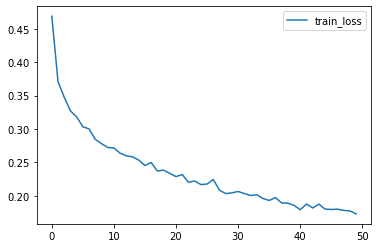

In [58]:
import matplotlib.pyplot as plt
# 训练集上的训练过程中的评价指标数据记录
plt.plot(history.history['loss'],label = 'train_loss')
# plt.plot(history.history['accuracy'], label = 'train_accuracy')
plt.legend()
plt.savefig('./lstm_training.jpg')
plt.show()


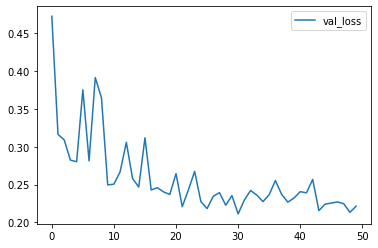

In [59]:
import matplotlib.pyplot as plt
# 验证集上的训练过程中的评价指标数据记录
plt.plot(history.history['val_loss'],label = 'val_loss')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.savefig('./lstm_test.jpg')
plt.show()

In [60]:
# 保存模型
# model.save('keras_model/model.h5')


In [61]:
# # # 加载完成训练的模型
# from keras.models import load_model
# model = load_model('keras_model/model.h5')



In [64]:
# # # 测试集的真实类别
# # list(y_test_bp)
# #
#

auc: 0.8740671606291363
recall: 0.8475452196382429
precision: 0.8312007426301371
f1: 0.8491399286987522


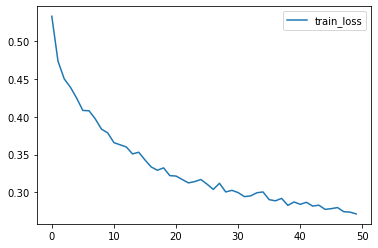

In [71]:
# 超参数
epochs = 50
batch_size = 32
# 模型的编译与训练
model_RNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_RNN = model_RNN.fit(x_train_rnn, y_train_rnn, epochs=epochs, batch_size=batch_size, verbose=1,validation_split=0.1)
#

Epoch 1/50
393/393 [==============================] - 1s 3ms/step - loss: 0.5300 - accuracy: 0.7498 - val_loss: 0.3812 - val_accuracy: 0.8395

In [72]:
# 在测试集上评估模型
model_RNN.evaluate(x_test_rnn,y_test_rnn)
# print(model_RNN.evaluate(x_test_rnn,y_test_rnn)[1])

110/110 [==============================] - 0s 946us/step - loss: 0.2157 - accuracy: 0.8997


[0.2157355099916458, 0.8997134566307068]

In [73]:
# 测试集的预测类别
# model_RNN.predict_classes(x_test_rnn).reshape(-1).tolist()

In [74]:
# 测试集的真实类别
# list(y_test_rnn)
#

In [75]:
from sklearn.metrics import recall_score, roc_auc_score
recall_rnn = recall_score(list(y_test_rnn),model_RNN.predict_classes(x_test_rnn).reshape(-1).tolist())
auc_rnn = roc_auc_score(list(y_test_rnn),model_RNN.predict_classes(x_test_rnn).reshape(-1).tolist())
print("auc:",auc_rnn)
print("recall",recall_rnn)
print("precision:",precision_score(y_test_rnn, model_BP.predict_classes(x_test_rnn).reshape(-1).tolist(), average='macro'))
print("f1:",f1_score(y_test_rnn, model_BP.predict_classes(x_test_rnn).reshape(-1).tolist(), average='macro'))


auc: 0.8736723331544717
recall 0.8268733850129198
precision: 0.8312007426301371
f1: 0.8491399286987522


In [76]:
# 训练网路的数据记录
history_RNN.history
#

{'loss': [0.530018150806427,
  0.43178996443748474,
  0.3856063187122345,
  0.3596244156360626,
  0.3435748815536499,
  0.3308882713317871,
  0.32114747166633606,
  0.3176455795764923,
  0.3128646910190582,
  0.3043690621852875,
  0.30490612983703613,
  0.3002302050590515,
  0.2925795018672943,
  0.28678855299949646,
  0.286476731300354,
  0.2813732922077179,
  0.2752200961112976,
  0.2764393091201782,
  0.2693547010421753,
  0.27405214309692383,
  0.27100613713264465,
  0.2627066373825073,
  0.26379746198654175,
  0.26392683386802673,
  0.26113706827163696,
  0.26072242856025696,
  0.2589379549026489,
  0.25589558482170105,
  0.25126516819000244,
  0.25531521439552307,
  0.2475769966840744,
  0.24798771739006042,
  0.24518601596355438,
  0.2452065497636795,
  0.2441709041595459,
  0.24322593212127686,
  0.2470000833272934,
  0.23690643906593323,
  0.24170808494091034,
  0.23389184474945068,
  0.24165284633636475,
  0.23481039702892303,
  0.23258715867996216,
  0.23605529963970184,
  0

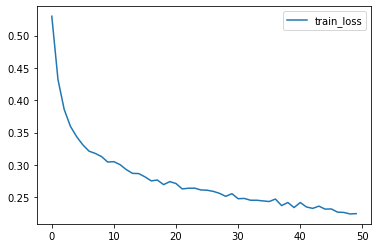

In [77]:
import matplotlib.pyplot as plt
# 训练集上的训练过程中的评价指标数据记录
plt.plot(history_RNN.history['loss'],label = 'train_loss')
# plt.plot(history_RNN.history['accuracy'], label = 'train_accuracy')
plt.legend()
plt.savefig('./rnn_training.jpg')
plt.show()
#

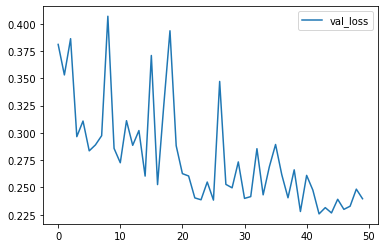

In [78]:
import matplotlib.pyplot as plt
# 验证集上的训练过程中的评价指标数据记录
plt.plot(history_RNN.history['val_loss'],label = 'val_loss')
# plt.plot(history_RNN.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.savefig('./rnn_test.jpg')
plt.show()
#

In [79]:
# # 保存模型
# model_RNN.save('keras_model/model_rnn.h5')

In [80]:
# # # 加载完成训练的模型
# from keras.models import load_model
# model = load_model('keras_model/model_rnn.h5')